font-identifier model from hugging face

In [1]:
import transformers

In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-classification", model="gaborcselle/font-identifier")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/3.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/44.9M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [3]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("gaborcselle/font-identifier")
model = AutoModelForImageClassification.from_pretrained("gaborcselle/font-identifier")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [45]:
import os
import random
import torch
import torch.nn as nn
from torchvision import models, transforms
import matplotlib.pyplot as plt
from PIL import Image
FONT_ALLOWLIST = ["Agbalumo-Regular",
                  "ALfaSlabOne-Regular",
                  "ArchitectsDaughter-Regular",
                  "Arial",
                  "Arial Black",
                  "Arial Bold",
                  "Arial Bold Italic",
                  "Avenir",
                  "Bangers-Regular",
                  "BlackOpsOne-Regular",
                  "Courier",
                  "Georgia",
                  "Helvetica",
                  "IBMPlexSans-Regular",
                  "Inter-Regular",
                  "KaushanScript-Regular",
                  "Lato-Regular",
                  "Lobster-Regular",
                  "Lora-regular",
                  "Merriweather-Regular",
                  "Niconne-Regular",
                  "OpenSans-Bold",
                  "OpenSans-Italic",
                  "OpenSans-Light",
                  "Pacifico-Regular",
                  "PixelifySans-Regular",
                  "PlayfairDisplay-Regular",
                  "Poppins-Regular",
                  "Rakkas-Regular",
                  "Roboto-Regular",
                  "RobotoMono-Regular",
                  "RobotoSlab-Regular",
                  "Rubik-Regular",
                  "SpaceMono-Regular",
                  "Tahoma",
                  "Tahoma Bold",
                  "Times New Roman",
                  "Times New Roman Bold",
                  "Times New Roman Bold Italic",
                  "Times New Roman Italic",
                  "TitilliumWeb-Regular",
                  "Trebuchet MS",
                  "Trebuchet MS Bold",
                  "Trebuchet MS Bold Italic",
                  "Trebuchet MS Italic",
                  "Verdana",
                  "Verdana Bold",
                  "Verdana Bold Italic",
                  "Verdana Italic"
                  ]

In [49]:
image_path = "/content/50&502014.png"
# image_path = "/content/1661Nebbiolo2021.png"
image = Image.open(image_path)
# image.size
image = image.crop((0, 300, image.size[0]-1,300+224))
image = image.resize((224,224))

data_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=3), # Convert images to grayscale with 3 channels
    transforms.RandomCrop((224, 224)), # Resize images to the expected input size of the model
    transforms.ToTensor(), # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize with ImageNet stats
])

# Load the image and apply the transformations
# image = Image.open(image_path)
# image.resize((224, 224)).show()
# image = image.resize((224, 224))
image.show()
image_tensor = data_transforms(image).unsqueeze(0)

# Classify the image using the trained model
model.eval()
with torch.no_grad():
    output = model(image_tensor)
    _, predicted = torch.max(output.logits, 1)
    pr = torch.topk(output.logits,2).indices
# output.logits
print(predicted.item())
print(output.logits)
print(pr)
print(FONT_ALLOWLIST[pr[0][0]], FONT_ALLOWLIST[pr[0][1]])

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1
tensor([[-0.9921,  4.9463, -1.5496,  0.6330,  0.7622, -1.3552, -0.4566, -1.1269,
          2.1348,  0.9369, -0.1733, -1.0517, -0.2739, -0.9249,  0.1258, -0.6175,
         -0.8954,  0.4192, -0.7811, -0.9551, -1.5261, -0.9737, -0.6553, -1.1548,
         -0.8930, -1.5639, -1.7217,  0.1111,  1.1707, -0.7808, -1.3116, -0.5130,
          1.2157, -0.2483, -0.3048, -0.1923,  0.5582, -1.0977, -1.1886, -1.1845,
         -1.4391, -2.2679, -0.0928, -1.4500, -1.3178, -0.6343, -1.0145, -1.0503,
         -0.7281]])
tensor([[1, 8]])
ALfaSlabOne-Regular Bangers-Regular


In [55]:
!unzip images_tuscany.zip

Streaming output truncated to the last 5000 lines.
 extracting: content/images/CàDelPazzoSangiovese-CabernetSauvignon2018.png  
 extracting: content/images/CaseViaSyrah2016.png  
  inflating: content/images/VignetoLaCasucciaChiantiClassicoGranSelezione2004.png  
 extracting: content/images/Kepos2015.png  
  inflating: content/images/BrunellodiMontalcinoMontosoli2011.png  
 extracting: content/images/BiancodiOrmaVermentino2021.png  
  inflating: content/images/SangioveseRosatoToscana2021.png  
  inflating: content/images/PerNonDormire2012.png  
  inflating: content/images/BurianoToscana2017.png  
  inflating: content/images/CaratoVernacciadiSanGimignano2020.png  
 extracting: content/images/PalazziRossoToscana2015.png  
  inflating: content/images/NectarDeiMaremmaToscana2008.png  
  inflating: content/images/OriginiBrunellodiMontalcino2015.png  
 extracting: content/images/PoggioAlVentoBrunellodiMontalcinoRiserva2013.png  
  inflating: content/images/ColtassalaChiantiClassicoGranSelezio

In [18]:
!sudo apt-get install imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libdjvulibre-text libdjvulibre21
  libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10
  libwmflite-0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng enscript gimp
  gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance sane-utils
  texlive-base-bin transfig ufraw-batch libfftw3-bin libfftw3-dev inkscape
  poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fon

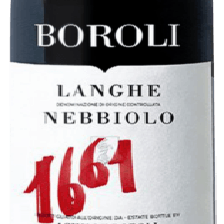

In [29]:

image = Image.open("/content/1661Nebbiolo2021.png")
# image.size
image = image.crop((0, 300, image.size[0]-1,300+224))
image.resize((224,224))
# image.resize((224, 224))
# image = image.resize((224, 224))
# image

In [51]:
import pandas as pd

In [52]:
dft = pd.read_csv("scaled_features_tuscany.csv")
dfp = pd.read_csv("scaled_features_piemonte.csv")
dft.head(2)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,...,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,price,rating,grade_avg
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,1.750861,0.250517,0.121760,0.266658,0.646820,-0.679265,...,-0.180086,1.062009,-0.292457,0.214080,0.422017,-0.356926,-1.749009,724.5,0.0,4.028714
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,1.750861,0.346001,-0.531521,0.266658,0.065375,-0.382915,...,-0.180082,-0.688356,-0.770617,0.806691,-0.014314,1.626523,0.920636,800.0,4.7,4.386521


In [53]:
images_tuscany = dft.image_names.to_list()
images_piemonte = dfp.image_names.to_list()
len(images_tuscany)

10394

In [58]:
font_1_tuscany = []
font_2_tuscany = []
font_1_piemonte = []
font_2_piemonte = []

In [59]:
count = 0
data_transforms = transforms.Compose([
      transforms.Grayscale(num_output_channels=3), # Convert images to grayscale with 3 channels
      transforms.RandomCrop((224, 224)), # Resize images to the expected input size of the model
      transforms.ToTensor(), # Convert images to PyTorch tensors
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize with ImageNet stats
  ])
for image_name in images_tuscany:

  image = Image.open("/content/content/images_tuscany/" + image_name)

  # меняем размер картинки под модель
  if image.size[1] >= 525:
    image = image.crop((0, 300, image.size[0]-1,300+224))
  else:
    image = image.crop((0, image.size[1]-525, image.size[0]-1,image.size[1]-1))
  image = image.resize((224,224))

  image_tensor = data_transforms(image).unsqueeze(0)

  # Classify the image using the trained model
  model.eval()
  with torch.no_grad():
      output = model(image_tensor)
      _, predicted = torch.max(output.logits, 1)
      pr = torch.topk(output.logits,2).indices
  # output.logits
  # print(predicted.item())
  # print(output.logits)
  # print(pr)
  # print(FONT_ALLOWLIST[pr[0][0]], FONT_ALLOWLIST[pr[0][1]])
  font_1_tuscany.append(FONT_ALLOWLIST[pr[0][0]])
  font_2_tuscany.append(FONT_ALLOWLIST[pr[0][1]])
  count += 1
  if count % 100 == 0: print(count)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300


In [61]:
from operator import countOf
for font in FONT_ALLOWLIST:
  print(countOf(font_1_tuscany, font), font)
print("----------------------------")
for font in FONT_ALLOWLIST:
  print(countOf(font_2_tuscany, font), font)

0 Agbalumo-Regular
9923 ALfaSlabOne-Regular
0 ArchitectsDaughter-Regular
0 Arial
49 Arial Black
0 Arial Bold
0 Arial Bold Italic
0 Avenir
126 Bangers-Regular
0 BlackOpsOne-Regular
2 Courier
0 Georgia
0 Helvetica
0 IBMPlexSans-Regular
0 Inter-Regular
0 KaushanScript-Regular
0 Lato-Regular
0 Lobster-Regular
180 Lora-regular
0 Merriweather-Regular
21 Niconne-Regular
0 OpenSans-Bold
0 OpenSans-Italic
3 OpenSans-Light
0 Pacifico-Regular
0 PixelifySans-Regular
0 PlayfairDisplay-Regular
0 Poppins-Regular
0 Rakkas-Regular
0 Roboto-Regular
3 RobotoMono-Regular
0 RobotoSlab-Regular
0 Rubik-Regular
33 SpaceMono-Regular
0 Tahoma
0 Tahoma Bold
15 Times New Roman
0 Times New Roman Bold
0 Times New Roman Bold Italic
39 Times New Roman Italic
0 TitilliumWeb-Regular
0 Trebuchet MS
0 Trebuchet MS Bold
0 Trebuchet MS Bold Italic
0 Trebuchet MS Italic
0 Verdana
0 Verdana Bold
0 Verdana Bold Italic
0 Verdana Italic
----------------------------
0 Agbalumo-Regular
226 ALfaSlabOne-Regular
0 ArchitectsDaughter

In [62]:
count = 0
data_transforms = transforms.Compose([
      transforms.Grayscale(num_output_channels=3), # Convert images to grayscale with 3 channels
      transforms.RandomCrop((224, 224)), # Resize images to the expected input size of the model
      transforms.ToTensor(), # Convert images to PyTorch tensors
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize with ImageNet stats
  ])
for image_name in images_piemonte:

  image = Image.open("/content/content/images_piemonte/" + image_name)

  # меняем размер картинки под модель
  if image.size[1] >= 525:
    image = image.crop((0, 300, image.size[0]-1,300+224))
  else:
    image = image.crop((0, image.size[1]-525, image.size[0]-1,image.size[1]-1))
  image = image.resize((224,224))

  image_tensor = data_transforms(image).unsqueeze(0)

  # Classify the image using the trained model
  model.eval()
  with torch.no_grad():
      output = model(image_tensor)
      _, predicted = torch.max(output.logits, 1)
      pr = torch.topk(output.logits,2).indices
  # output.logits
  # print(predicted.item())
  # print(output.logits)
  # print(pr)
  # print(FONT_ALLOWLIST[pr[0][0]], FONT_ALLOWLIST[pr[0][1]])
  font_1_piemonte.append(FONT_ALLOWLIST[pr[0][0]])
  font_2_piemonte.append(FONT_ALLOWLIST[pr[0][1]])
  count += 1
  if count % 100 == 0: print(count)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900


In [63]:
from operator import countOf
for font in FONT_ALLOWLIST:
  print(countOf(font_1_piemonte, font), font)
print("----------------------------")
for font in FONT_ALLOWLIST:
  print(countOf(font_2_piemonte, font), font)

0 Agbalumo-Regular
5716 ALfaSlabOne-Regular
1 ArchitectsDaughter-Regular
0 Arial
21 Arial Black
0 Arial Bold
0 Arial Bold Italic
0 Avenir
16 Bangers-Regular
0 BlackOpsOne-Regular
0 Courier
0 Georgia
0 Helvetica
0 IBMPlexSans-Regular
0 Inter-Regular
0 KaushanScript-Regular
0 Lato-Regular
0 Lobster-Regular
52 Lora-regular
0 Merriweather-Regular
7 Niconne-Regular
0 OpenSans-Bold
0 OpenSans-Italic
1 OpenSans-Light
0 Pacifico-Regular
0 PixelifySans-Regular
13 PlayfairDisplay-Regular
0 Poppins-Regular
0 Rakkas-Regular
0 Roboto-Regular
10 RobotoMono-Regular
0 RobotoSlab-Regular
0 Rubik-Regular
30 SpaceMono-Regular
0 Tahoma
0 Tahoma Bold
22 Times New Roman
0 Times New Roman Bold
0 Times New Roman Bold Italic
44 Times New Roman Italic
0 TitilliumWeb-Regular
0 Trebuchet MS
0 Trebuchet MS Bold
0 Trebuchet MS Bold Italic
0 Trebuchet MS Italic
0 Verdana
0 Verdana Bold
0 Verdana Bold Italic
0 Verdana Italic
----------------------------
0 Agbalumo-Regular
95 ALfaSlabOne-Regular
5 ArchitectsDaughter-R

In [ ]:
Agbalumo-Regular = []
ALfaSlabOne-Regular = []
ArchitectsDaughter-Regular = []
Arial = []
ArialBlack = []
ArialBold = []
ArialBoldItalic = []
Avenir = []
Bangers-Regular = []
BlackOpsOne-Regular = []
Courier = []
Georgia = []
Helvetica = []
IBMPlexSans-Regular = []
Inter-Regular
KaushanScript-Regular
Lato-Regular
Lobster-Regular
Lora-regular
Merriweather-Regular
Niconne-Regular
OpenSans-Bold
OpenSans-Italic
OpenSans-Light
Pacifico-Regular
PixelifySans-Regular
PlayfairDisplay-Regular
Poppins-Regular
Rakkas-Regular
Roboto-Regular
RobotoMono-Regular
RobotoSlab-Regular
Rubik-Regular
SpaceMono-Regular
Tahoma
TahomaBold
TimesNewRoman
TimesNewRomanBold
TimesNewRomanBoldItalic
TimesNewRomanItalic
TitilliumWeb-Regular
TrebuchetMS
TrebuchetMSBold
TrebuchetMSBoldItalic
TrebuchetMSItalic
Verdana
VerdanaBold
VerdanaBoldItalic
VerdanaItalic

In [ ]:
font_dict =  {"Agbalumo-Regular":
                  "ALfaSlabOne-Regular",
                  "ArchitectsDaughter-Regular",
                  "Arial",
                  "Arial Black",
                  "Arial Bold",
                  "Arial Bold Italic",
                  "Avenir",
                  "Bangers-Regular",
                  "BlackOpsOne-Regular",
                  "Courier",
                  "Georgia",
                  "Helvetica",
                  "IBMPlexSans-Regular",
                  "Inter-Regular",
                  "KaushanScript-Regular",
                  "Lato-Regular",
                  "Lobster-Regular",
                  "Lora-regular",
                  "Merriweather-Regular",
                  "Niconne-Regular",
                  "OpenSans-Bold",
                  "OpenSans-Italic",
                  "OpenSans-Light",
                  "Pacifico-Regular",
                  "PixelifySans-Regular",
                  "PlayfairDisplay-Regular",
                  "Poppins-Regular",
                  "Rakkas-Regular",
                  "Roboto-Regular",
                  "RobotoMono-Regular",
                  "RobotoSlab-Regular",
                  "Rubik-Regular",
                  "SpaceMono-Regular",
                  "Tahoma",
                  "Tahoma Bold",
                  "Times New Roman",
                  "Times New Roman Bold",
                  "Times New Roman Bold Italic",
                  "Times New Roman Italic",
                  "TitilliumWeb-Regular",
                  "Trebuchet MS",
                  "Trebuchet MS Bold",
                  "Trebuchet MS Bold Italic",
                  "Trebuchet MS Italic",
                  "Verdana",
                  "Verdana Bold",
                  "Verdana Bold Italic",
                  "Verdana Italic"
}

In [64]:
dft["font_1"] = font_1_tuscany
dft["font_2"] = font_2_tuscany
dfp["font_1"] = font_1_piemonte
dfp["font_2"] = font_2_piemonte
dft.head(3)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,...,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,price,rating,grade_avg,font_1,font_2
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,1.750861,0.250517,0.121760,0.266658,0.646820,-0.679265,...,-0.292457,0.214080,0.422017,-0.356926,-1.749009,724.5,0.0,4.028714,ALfaSlabOne-Regular,Bangers-Regular
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,1.750861,0.346001,-0.531521,0.266658,0.065375,-0.382915,...,-0.770617,0.806691,-0.014314,1.626523,0.920636,800.0,4.7,4.386521,ALfaSlabOne-Regular,Bangers-Regular
2,Tenuta Tignanello 'Solaia' 2006,https://www.vivino.com/IT/en/antinori-tuscany-...,https://images.vivino.com/thumbs/fJfjGhCtQ_KAu...,TenutaTignanello'Solaia'2006.png,-0.550966,0.475975,-0.539296,0.266658,-0.187788,0.390656,...,-0.165836,0.508883,0.991805,0.640993,-1.837117,560.0,4.7,4.678044,ALfaSlabOne-Regular,Bangers-Regular


In [65]:
dft_encoded = pd.get_dummies(dft, columns=['font_1', "font_2"])
dfp_encoded = pd.get_dummies(dfp, columns=['font_1', "font_2"])
dft_encoded.head(2)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,...,font_2_Poppins-Regular,font_2_Rakkas-Regular,font_2_RobotoMono-Regular,font_2_RobotoSlab-Regular,font_2_Rubik-Regular,font_2_SpaceMono-Regular,font_2_Tahoma Bold,font_2_Times New Roman,font_2_Times New Roman Italic,font_2_Verdana Italic
0,Bolgheri Rosso 1998,https://www.vivino.com/IT/en/le-macchiole-bolg...,https://images.vivino.com/thumbs/vqcwf45nRNaD4...,BolgheriRosso1998.png,1.750861,0.250517,0.121760,0.266658,0.646820,-0.679265,...,0,0,0,0,0,0,0,0,0,0
1,Brunello di Montalcino Riserva 2010,https://www.vivino.com/IT/en/cupano-brunello-d...,https://images.vivino.com/thumbs/LQwoyH7QSIa3j...,BrunellodiMontalcinoRiserva2010.png,1.750861,0.346001,-0.531521,0.266658,0.065375,-0.382915,...,0,0,0,0,0,0,0,0,0,0


In [70]:
pd.options.display.max_columns = 100

In [71]:
dft_encoded.describe()

,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,price,rating,grade_avg,font_1_ALfaSlabOne-Regular,font_1_Arial Black,font_1_Bangers-Regular,font_1_Courier,font_1_Lora-regular,font_1_Niconne-Regular,font_1_OpenSans-Light,font_1_RobotoMono-Regular,font_1_SpaceMono-Regular,font_1_Times New Roman,font_1_Times New Roman Italic,font_2_ALfaSlabOne-Regular,font_2_Arial,font_2_Arial Black,font_2_Bangers-Regular,font_2_BlackOpsOne-Regular,font_2_Courier,font_2_Inter-Regular,font_2_Lora-regular,font_2_Niconne-Regular,font_2_OpenSans-Light,font_2_PlayfairDisplay-Regular,font_2_Poppins-Regular,font_2_Rakkas-Regular,font_2_RobotoMono-Regular,font_2_RobotoSlab-Regular,font_2_Rubik-Regular,font_2_SpaceMono-Regular,font_2_Tahoma Bold,font_2_Times New Roman,font_2_Times New Roman Italic,font_2_Verdana Italic
count,1.039400e+04,1.039400e+04,1.039400e+04,1.039400e+04,1.039400e+04,1.039400e+04,10394.000000,1.039400e+04,1.039400e+04,1.039400e+04,1.039400e+04,1.039400e+04,1.039400e+04,1.039400e+04,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000,10394.000000
mean,-3.281321e-17,5.550901e-16,-1.175807e-16,3.171944e-15,-1.449250e-16,-1.039085e-16,0.934097,3.828208e-17,1.244168e-16,-6.015755e-17,-4.648538e-17,-8.203303e-17,-1.784218e-16,-2.002973e-16,79.738538,2.666192,4.023848,0.954685,0.004714,0.012122,0.000192,0.017318,0.002020,0.000289,0.000289,0.003175,0.001443,0.003752,0.021743,0.000866,0.166250,0.719838,0.001443,0.000385,0.000962,0.020396,0.000866,0.000289,0.000289,0.000866,0.027805,0.000962,0.000096,0.000962,0.007697,0.000096,0.023475,0.004618,0.000096
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,0.248125,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,186.091211,1.969769,0.297855,0.208003,0.068502,0.109438,0.013871,0.130458,0.044906,0.016987,0.016987,0.056260,0.037963,0.061143,0.145851,0.029415,0.372323,0.449100,0.037963,0.019614,0.031004,0.141359,0.029415,0.016987,0.016987,0.029415,0.164420,0.031004,0.009809,0.031004,0.087397,0.009809,0.151414,0.067802,0.009809
min,-9.419682e-01,-2.512825e+00,-2.158304e+00,-2.357360e+01,-1.229223e+00,-2.117380e+00,0.000000,-1.800859e-01,-1.419114e+00,-2.622849e+00,-1.231032e+00,-1.450704e+00,-1.372174e+00,-3.716761e+00,0.760000,0.000000,2.857143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.115305e-01,-7.695392e-01,-6.593333e-01,2.666584e-01,-4.270111e-01,-6.837531e-01,1.000000,-1.800858e-01,-7.033873e-01,-4.621694e-01,-7.513615e-01,-7.995680e-01,-8.123445e-01,-6.375740e-01,17.000000,0.000000,3.804856,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-5.135163e-01,-2.496585e-01,-7.745399e-02,2.666584e-01,-2.132758e-01,-3.345671e-01,1.000000,-1.800747e-01,-3.142287e-01,3.727876e-02,-2.192171e-01,-1.699104e-01,-2.251846e-01,4.925742e-02,35.500000,3.900000,4.050732,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00

In [72]:
dft_encoded.columns

Index(['Wine', 'link', 'image_link', 'image_names', 'temperature',
       'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'quality', 'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size', 'price', 'rating',
       'grade_avg', 'font_1_ALfaSlabOne-Regular', 'font_1_Arial Black',
       'font_1_Bangers-Regular', 'font_1_Courier', 'font_1_Lora-regular',
       'font_1_Niconne-Regular', 'font_1_OpenSans-Light',
       'font_1_RobotoMono-Regular', 'font_1_SpaceMono-Regular',
       'font_1_Times New Roman', 'font_1_Times New Roman Italic',
       'font_2_ALfaSlabOne-Regular', 'font_2_Arial', 'font_2_Arial Black',
       'font_2_Bangers-Regular', 'font_2_BlackOpsOne-Regular',
       'font_2_Courier', 'font_2_Inter-Regular', 'font_2_Lora-regular',
       'font_2_Niconne-Regular', 'font_2_OpenSans-Light',
       'font_2_PlayfairDisplay-Regular', 'font_2_P

In [73]:
dfp_encoded.columns

Index(['Wine', 'link', 'image_names', 'image_link', 'temperature',
       'saturation', 'brightness', 'contrast', 'clarity', 'colorfulness',
       'quality', 'rule_of_thirds', 'colour_balance_vert',
       'colour_balance_hor', 'physical_balance_vert', 'physical_balance_hor',
       'diagonal_dominance', 'figure_ground_size', 'price', 'rating',
       'grade_avg', 'font_1_ALfaSlabOne-Regular',
       'font_1_ArchitectsDaughter-Regular', 'font_1_Arial Black',
       'font_1_Bangers-Regular', 'font_1_Lora-regular',
       'font_1_Niconne-Regular', 'font_1_OpenSans-Light',
       'font_1_PlayfairDisplay-Regular', 'font_1_RobotoMono-Regular',
       'font_1_SpaceMono-Regular', 'font_1_Times New Roman',
       'font_1_Times New Roman Italic', 'font_2_ALfaSlabOne-Regular',
       'font_2_ArchitectsDaughter-Regular', 'font_2_Arial Black',
       'font_2_Bangers-Regular', 'font_2_Courier', 'font_2_Inter-Regular',
       'font_2_Lora-regular', 'font_2_Niconne-Regular',
       'font_2_OpenSans-

In [78]:
zeros_t = [0] * 10394
zeros_p = [0] * 5933

In [75]:
dft.shape

(10394, 23)

In [76]:
dfp.shape

(5933, 23)

In [77]:
dft.tail(1)

,Wine,link,image_link,image_names,temperature,saturation,brightness,contrast,clarity,colorfulness,quality,rule_of_thirds,colour_balance_vert,colour_balance_hor,physical_balance_vert,physical_balance_hor,diagonal_dominance,figure_ground_size,price,rating,grade_avg,font_1,font_2
10393,Massimo Brunello di Montalcino Riserva 2015,https://www.vivino.com/IT/en/villa-le-prata-ma...,https://images.vivino.com/thumbs/DXWwCfEbTtG8h...,MassimoBrunellodiMontalcinoRiserva2015.png,1.750861,-0.458822,-1.201865,0.266658,-0.463475,-0.709554,1,-0.180022,-0.700065,-1.173061,0.552971,0.001746,-0.434374,-0.695643,185.0,0.0,4.438462,ALfaSlabOne-Regular,Bangers-Regular


In [80]:
df1 = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie'],
    'age': [25, 30, 35],
    'gender': ['F', 'M', 'M']
})

# create second dataframe
df2 = pd.DataFrame({
    'name': ['A', 'B', 'C'],
    'age': [50000, 60000, 70000],
    'occupation': ['Engineer', 'Manager', 'Analyst']
})
result = pd.concat([df1, df2], axis=0, join='outer').fillna(0)

In [81]:
result

,name,age,gender,occupation
0,Alice,25,F,0
1,Bob,30,M,0
2,Charlie,35,M,0
0,A,50000,0,Engineer
1,B,60000,0,Manager
2,C,70000,0,Analyst


In [84]:
dft_encoded.to_csv("scaled_features_tuscany.csv", index=False)

In [85]:
dfp_encoded.to_csv("scaled_features_piemonte.csv", index=False)